In [42]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes 
import support_file as sf
import matplotlib.pyplot as plt
import seaborn as sns
import normalization
from sklearn.preprocessing import MinMaxScaler

Importing data

In [43]:
data_hot_clustering = sf.data_hot_clustering

data_norm = normalization.normalized_dataframe
#print(data_norm.info())

# Clusters are strongly influenced by State group
#data_clustering_state_heavy = pd.concat([data_norm,data_hot_clustering["State group"]], axis = 1)






Turning df in numpy array, bc ktypes takes numpy array as input

In [44]:
data_array = data_clustering.values
print(data_array)

[[0.7514247440663249 0.6266200194046875 0.9817305285247239 ...
  0.6373215012336538 'MEDIUM' 2]
 [0.36230641030445865 0.3930156526373599 0.5373816959268674 ...
  0.23751328224547602 'LOW' 3]
 [0.7224094088695037 0.7870502725948471 0.43197245643301385 ...
  0.6248649868977214 'LOW' 0]
 ...
 [0.47135426700224914 0.4519305392106132 0.7420922711232892 ...
  0.5631162205385317 'LOW' 2]
 [0.5736246602728934 0.5866994179540119 0.4548380466597813 ...
  0.3687726188518422 'MEDIUM' 2]
 [0.6331775526975603 0.590836898976984 0.24907813056471056 ...
  0.4531458391658588 'HIGH' 1]]


Marking the numerical values (although already float value !! probably not neccessary)

In [45]:
data_array[:,0] = data_array[:,0].astype(float)
data_array[:,1] = data_array[:,1].astype(float)
data_array[:,2] = data_array[:,2].astype(float)
data_array[:,3] = data_array[:,3].astype(float)
data_array[:,4] = data_array[:,4].astype(float)

Choosing optimal number of cluster k

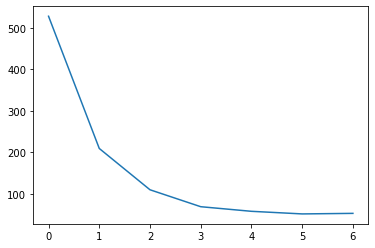

In [46]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(data_array, categorical=[5])
    cost.append(kproto.cost_)

plt.plot(cost)

In [47]:
kproto = KPrototypes(n_clusters=2, max_iter=20)
clusters = kproto.fit_predict(data_array, categorical=[5])

In [48]:
print(kproto.cluster_centroids_)
print(clusters)

[array([[0.61105548, 0.61367909, 0.44688224, 0.64899197, 0.61554413,
        0.63636364],
       [0.49994547, 0.49713915, 0.5077258 , 0.49104502, 0.39388127,
        2.51470588]]), array([['HIGH'],
       ['LOW']], dtype='<U4')]
[1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1
 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0
 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1
 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1
 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 0 1 1 1 

In [49]:
cluster_list = []
for i in clusters:
    cluster_list.append(i)

Adding clusters to original dataframe 

In [50]:
data_clustering["Clusters"] = cluster_list

Analyzing cluster 0

In [51]:
data_clustering[data_clustering["Clusters"] == 0].head(10)
#data_clustering[data_clustering["Clusters"] == 0].describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State group,Clusters
2,0.722409,0.787050,0.431972,0.464871,0.624865,LOW,0
3,0.656645,0.531630,0.000000,0.851953,0.737712,HIGH,0
5,0.674313,0.736999,0.588489,0.489867,0.601066,LOW,0
11,0.466977,0.828157,0.522282,0.618895,0.672268,MEDIUM,0
13,0.752981,0.662581,0.607978,0.886472,0.868053,MEDIUM,0
16,0.541494,0.524849,0.157093,0.595888,0.518013,HIGH,0
17,0.540772,0.522277,0.539086,0.729479,0.569452,HIGH,0
20,0.497618,0.472400,0.171632,0.628687,0.472883,HIGH,0
28,0.508768,0.456534,0.464076,0.713281,0.554179,HIGH,0
29,0.761609,0.700787,0.550178,0.588286,0.649503,MEDIUM,0


Analyzing cluster 1

In [52]:
data_clustering[data_clustering["Clusters"] == 1].head(10)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State group,Clusters
0,0.751425,0.626620,0.981731,0.621842,0.637322,MEDIUM,1
1,0.362306,0.393016,0.537382,0.390475,0.237513,LOW,1
4,0.376734,0.431827,0.424754,0.720091,0.501744,MEDIUM,1
6,0.675040,0.729859,0.529076,0.360885,0.442581,LOW,1
7,0.000000,0.370631,0.566494,0.615939,0.271082,HIGH,1
8,0.432185,0.701116,0.412471,0.362832,0.397333,MEDIUM,1
9,0.182420,0.623743,0.334292,0.503634,0.379621,LOW,1
10,0.392442,0.487353,0.080300,0.467473,0.371588,MEDIUM,1
12,0.511614,0.431698,0.602596,0.706215,0.528569,MEDIUM,1
14,0.529254,0.492180,0.627757,0.399886,0.300779,MEDIUM,1


Analyzing cluster 2

In [53]:
data_clustering[data_clustering["Clusters"] == 2].head(10)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State group,Clusters


Visualizing clusters

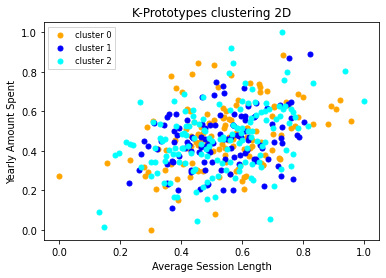

In [54]:
x = data_clustering.iloc[:,[0,4,5]].values

#print(x)

kproto = KPrototypes(n_clusters=3, max_iter=20)
clusters = kproto.fit_predict(x, categorical=[2])



plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], s = 25, c = 'orange', label="cluster 0")
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], s = 25, c = "blue", label="cluster 1")
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1], s = 25, c = 'cyan', label="cluster 2")

#plt.scatter(kproto.cluster_centroids_[:,0], kproto.cluster_centroids_[:, 1], s = 25, c = 'black' , label = 'centroid', marker="x")
plt.xlabel("Average Session Length")
plt.ylabel("Yearly Amount Spent")
plt.title('K-Prototypes clustering 2D' )
plt.legend(fancybox=False, fontsize='small')
plt.show()